In [5]:
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import SessionNotCreatedException,StaleElementReferenceException,NoSuchElementException
import time
from selenium.webdriver.common.by import By
import re
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import numpy as np

In [58]:
!pip install webdriver_manager
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Current google-chrome version is 87.0.4280
[WDM] - Get LATEST driver version for 87.0.4280


[WDM] - Driver [/home/blank/.wdm/drivers/chromedriver/linux64/87.0.4280.20/chromedriver] found in cache


In [84]:
base_url = 'https://www.instagram.com/'
username='YOUR USERNAME'
password = 'YOUR PASSWORD'

In [60]:
def login(username,password):
    driver.get(base_url)
    time.sleep(3)
    detail = driver.find_elements_by_class_name('_2hvTZ')
    detail[0].clear()
    detail[1].clear()
    detail[0].send_keys(username)
    detail[1].send_keys(password)
    driver.find_element_by_class_name('L3NKy').click()
    time.sleep(3)
    for i in driver.find_elements_by_tag_name('button'):
        if i.text=='Not Now':
            i.click()
            break
    time.sleep(3)
    driver.find_element_by_class_name('HoLwm').click()

In [85]:
def check_search(insta_handle):
    l = []
    driver.find_element_by_class_name('XTCLo').clear()
    driver.find_element_by_class_name('XTCLo').send_keys(insta_handle)
    drop = WebDriverWait(driver,5)
    drop.until(EC.element_to_be_clickable((By.CLASS_NAME,'z556c')))
    num = len(driver.find_elements_by_class_name('z556c'))
    for i in driver.find_elements_by_class_name('yCE8d'):
        nam = i.text
        l.append(i.get_attribute('href'))
    driver.find_element_by_class_name('aIYm8').click()
    return l
def open_handle(insta_handle):
    # opens the insta handle for the specified user name
    driver.get(base_url)
    driver.find_element_by_class_name('XTCLo').clear()
    driver.find_element_by_class_name('XTCLo').send_keys(insta_handle)
    drop = WebDriverWait(driver,5)
    drop.until(EC.element_to_be_clickable((By.CLASS_NAME,'z556c')))
    num = len(driver.find_elements_by_class_name('z556c'))
    driver.find_element_by_class_name('z556c').click()
    time.sleep(3)

def str_num(x):
    #used to convert the string to number , like 12m to 12000000
    ans=''
    for i in x[:-1]:
        if i !='.':
            ans+=i
    if x[-1].lower()=='k':
        ans+='000'
    elif x[-1].lower()=='m':
        ans+='000000'
    else:
        ans+=x[-1]

    return int(ans)
def posts_recent(name,num = 10):
    # Gives the count of posts made in last particular number of days.By default 10.
    if driver.current_url==base_url or name :
        open_handle(name)
    ans = 0
    WebDriverWait(driver,3).until(EC.element_to_be_clickable((By.CLASS_NAME,'_9AhH0')))
    driver.find_element_by_class_name('_9AhH0').click()
    while 2:
        time.sleep(3)
#         driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[3]/section[1]/span[1]/button/div/span').click()
        msg = driver.find_element_by_class_name('c-Yi7').text.lower()
        if re.search('hour',msg) or re.search('minute',msg) or re.search('second',msg):        
            ans+=1
        elif re.search('day',msg):
            log = int(re.search(r'[\d]+',msg).group())
            if log<num:
                ans+=1
            else:
                driver.find_elements_by_class_name('wpO6b')[-1].click()
                return ans
        else:
            driver.find_elements_by_class_name('wpO6b')[-1].click()
            return ans
        driver.find_element_by_class_name('coreSpriteRightPaginationArrow').click()    
        
        
def posts_recent_content(name,num = 10):
    # Scrapes the content of particular number of recent posts and return all in one string
    if driver.current_url==base_url or name :
        open_handle(name)
    ans = 0
    content = ''
    WebDriverWait(driver,3).until(EC.element_to_be_clickable((By.CLASS_NAME,'_9AhH0')))
    driver.find_element_by_class_name('_9AhH0').click()
    while ans<num:
        time.sleep(2)
        content = content+driver.find_element_by_class_name('C4VMK').text
        ans+=1
        driver.find_element_by_class_name('coreSpriteRightPaginationArrow').click()
    driver.find_elements_by_class_name('wpO6b')[-1].click()
    return content
def absolute_value(val):
    # As i have how much % age each category represent this function just gives that number 
    sums=0
    for i in pie_chart[:,1]:
        sums+=float(i)
    a  = np.round(val/100*sums, 0)
    return int(a)
def find_num(s):
    # This is used to make string to number type . This is used when i scrape for likes this makes 12,121 likes to 12121.
    a=''
    for i in s:
        if ord(i)>=48 and ord(i)<=57:
            a+=i
    return int(a)
def posts_recent_like_count(name,num = 10):
    # This is to get the info of the top 10 / highest 10 posts likes count .
    #First I scrape all the picture using scrolling and store all posts link.
    # Then traverse all posts and then scrape for the likes they got.
    # By default top 10.
    links=set()
    if driver.current_url==base_url or name :
        open_handle(name)
    ans = 0
    curr = 0
    while curr!=driver.execute_script('return document.body.scrollHeight;'):
        curr = driver.execute_script('return document.body.scrollHeight;')
        driver.execute_script('window.scrollTo(0,document.body.scrollHeight)')
        time.sleep(2)
        for i in driver.find_elements_by_xpath('//div[contains(@class,"v1Nh3")]/a'):
            lin = i.get_attribute('href')
            links.add(lin) 
    content = []
    for i in links:              
        driver.get(i)
        if len(driver.find_elements_by_class_name('Nm9Fw')):
            val = re.search(r'[\d,]+',driver.find_element_by_class_name('EDfFK').text).group()
            val = find_num(val)
            if len(content)>0 and val==content[-1]:
                pass
            else:
                content.append(val)
        else:
            driver.find_element_by_class_name('vcOH2').click()
            val = re.search(r'[\d,]+',driver.find_element_by_class_name('vJRqr').text).group()
            val = find_num(val)
            if len(content)>0 and val==content[-1]:
                pass
            else:
                content.append(val)
            driver.find_element_by_class_name('QhbhU').click()
        driver.find_elements_by_class_name('wpO6b')[-1].click()
        time.sleep(3)
    open_handle(name)
    content.sort(reverse=True)
    
    return content[:num]


In [62]:
login(username,password)

In [10]:
# From the list of instagram handles you obtained when you searched ‘food’ in previous project.
# Open the first 10 handles and find the top 5 which have the highest number of followers

In [17]:
food_blogger = check_search('food')
top_10 = {}
for i in food_blogger[:10]:
    driver.get(i)
    time.sleep(2)
    b = str_num(re.search(r'[\d.]+[m,k]*',driver.find_element_by_partial_link_text('followers').text).group())
    top_10[i]=b


['foodnetwork', 'foodgod', 'food52', 'foodfusionpk', 'food.spy.ir']


In [22]:
names,posts = [],[]
for i in sorted(top_10.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)[:5]:
        user_name = i[0].split('/')[-2]
        posts_done = posts_recent(user_name,3)
        names.append(user_name)
        posts.append(posts_done)
print(names)

['foodnetwork', 'foodgod', 'food52', 'foodfusionpk', 'food.spy.ir']


In [24]:
#Now Find the number of posts these handles have done in the previous 3 days.

In [23]:
for i in range(5):
    print(names[i],posts[i])

foodnetwork 34
foodgod 2
food52 12
foodfusionpk 3
food.spy.ir 6


In [25]:
#Depict this information using a suitable graph.

<BarContainer object of 5 artists>

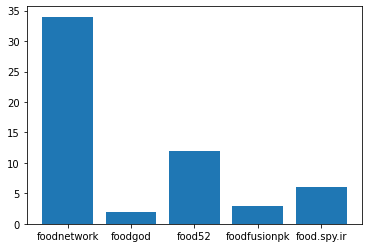

In [26]:
plt.bar(names,posts)

In [28]:
# Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [29]:
all_posts=''
for i in names:
    all_posts+=posts_recent_content(i)

In [30]:
#Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [31]:
s = ''
for i in all_posts:
    if ord(i) in [32,35] or (ord(i)>96 and ord(i)<123)or (ord(i)>64 and ord(i)<91):
        s+=i
counter = Counter(s.lower().split())
# I have not removed number as one may have hashtag with number in it.
s = ''
for i in all_posts:
    if i in ['(',')','[',']','{','}']:
        s+=' '
    else:
        s+=i
counter = Counter(s.lower().split())
for i in counter:
    print(i,counter[i])

In [42]:
# Create a csv file with two columns : the word and its frequency

In [43]:
data = pd.DataFrame.from_dict(counter,orient='index').reset_index()
data.columns=['Words','frequency']
data.to_csv('INSTABOT_21.csv',index=False)

In [44]:
# Now, find the hashtags that were most popular among these bloggers

In [45]:
d=Counter()
for i in counter.most_common():
    if i[0][0]=='#':
        print(i[0],counter[i[0]])
        d[i[0]]=counter[i[0]]

#foodfusion 13
#باجناق_تیستر 9
#happycookingtoyou 7
#instafood 7
#foodstagram 7
#cooking 5
#f52community 4
#f52grams 3
#winterrecipes 3
#recipes 3
#recipe 3
#snacks 3
#quickfood 3
#جوجه_کباب 3
#howtothanksgiving 2
#holidaybakingchampionship 2
#f52partner 2
#corn 2
#tikki 2
#کترینگ 2
#غذای_آماده 2
#کباب 2
#فوداسپای_کاشانی 2
#خورشت 2
#قیمه 2
#قورمه 2
#فوداسپای_نارمک 2
#گوشت 2
#مرغ 2
#پروتئینی 2
#تولید_سوسیس 2
#فوداسپای_نازی_آباد 2
#thekitchen 1
#buddyvschristmas 1
#happpycookingtoyou 1
#soup 1
#wintersoup 1
#eggmasala 1
#cornonthecob 1
#foodsstagram 1
#pumpkinseads 1
#dalgona 1
#dalgonacoffee 1
#mochacoffee 1
#coffee 1
#cofeerecipe 1
# 1
#winterdrinks 1
#drinks 1
#happycookigntoyou 1
#reshmichicken 1
#chickenrecipe 1
#foodfusionrecipe 1
#chickencurry 1
#curry 1
#foodie 1
#instafoodie 1
#homecooking 1
#foodfusionpk 1
#carrot 1
#winter 1
#snackrecipes 1
#pakistanifusion 1
#carrots 1
#halwa 1
#desicooking 1
#harbaarzaiqaydaar 1
#wohiriwayatimaza 1
#biryani 1
#rice 1
#malaiboti 1
#boti 1
#mo

In [81]:
# Plot a Pie Chart of the top 5 hashtags obtained and 
# the number of times they were used by these bloggers in the scraped posts.


([<matplotlib.patches.Wedge at 0x7f9c7f7ad7d0>,
 [Text(0.6400448207491376, 0.8946187050538372, '#foodfusion'),
  Text(-0.9173975725872823, 0.6069445557964602, '#باجناق_تیستر'),
  Text(-0.9173976294135288, -0.6069444699034977, '#happycookingtoyou'),
  Text(0.04017419305110425, -1.099266134388162, '#instafood'),
  Text(0.9592543436832606, -0.5383596419911111, '#foodstagram')],
 [Text(0.3491153567722568, 0.4879738391202748, '13'),
  Text(-0.5003986759566994, 0.33106066679806917, '9'),
  Text(-0.5003987069528338, -0.33106061994736236, '7'),
  Text(0.021913196209693227, -0.5995997096662702, '7'),
  Text(0.5232296420090512, -0.2936507138133333, '7')])

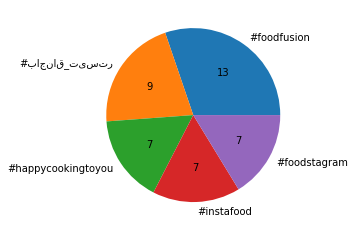

In [80]:
pie_chart = list(d.most_common(5))
pie_chart = np.array(pie_chart)
plt.pie(pie_chart[:,1],labels=pie_chart[:,0],autopct=absolute_value)

In [82]:
# Find out the likes of the top 10 posts of the 5 handles obtained earlier.

# ---------------------------------------------------------


# The following code may take hours to run and require a perfectly stable connections .

# This took several tries as even a moment of internet being slow will halt and give error for the whole program.

# I Also tried to click on post and then navigate one by one using right arrow on screen 
# but that method was even more unreliable


# -----------------------------------------------------

In [69]:
like_ratio=[]
for i in names:
    likes = posts_recent_like_count(i)
    print(i,likes)
    like_ratio.append(likes)

foodnetwork [187804, 101802, 99284, 94033, 92551, 90890, 85667, 83133, 81579, 78803]
foodgod [185237, 101670, 41395, 40194, 39549, 29850, 21807, 19417, 16202, 13136]
food52 [30540, 21169, 15940, 13860, 9046, 5337, 5325, 4710, 3423, 2540]
foodfusionpk [9509, 9481, 9212, 8354, 8139, 7125, 6506, 5886, 3895, 3052]
food.spy.ir [71902, 48944, 41970, 39790, 39697, 30353, 27478, 25780, 21612, 20700]


In [50]:
# Calculate the average likes for a handle.

In [71]:
for i in range(5):
    print(names[i],sum(like_ratio[i])/len(like_ratio[i]))

foodnetwork 99554.6
foodgod 50845.7
food52 11189.0
foodfusionpk 7115.9
food.spy.ir 36822.6


In [72]:
# Divide the average likes obtained from the number of 
# followers of the handle to get the average followers:like ratio of each handle.

In [75]:
like_follower_mean = []
for i in range(5):
    res = top_10[base_url+str(names[i])+'/']
    ans = sum(like_ratio[i])/len(like_ratio[i])
    like_follower_mean.append(ans)
    

In [76]:
# Create a bar graph to depict the above obtained information.

<BarContainer object of 5 artists>

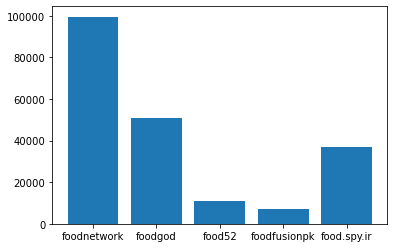

In [77]:
plt.bar(names,like_follower_mean)

In [ ]:
driver.close()

In [ ]:
driver.quit()

In [ ]:
from sys import stdin 
def stockSpan(price, n) : 
    stk = list() 
    output = [-1] * n 
    stk.append(0) 
    output[0] = 1 
    for i in range(1, n) : 
        while (not isEmpty(stk)) and (price[top(stk)] < price[i]) :
             stk.pop() 
        if isEmpty(stk) : 
            output[i] = i + 1 
        else :
            output[i] = i - top(stk) 
        stk.append(i) 
    return output 
def isEmpty(stack) : 
    return len(stack) == 0 
def top(stack) :
    return stack[len(stack) - 1] 
def printList(arr) : 
    for i in range(len(arr)) : 
        print(arr[i], end = " ") 
        print() 
def takeInput(): 
    size = int(stdin.readline().strip()) 
    if size == 0 : 
        return list(), 0 price = list(map(int, stdin.readline().strip().split(" "))) return price, size #main price, n = takeInput() output = stockSpan(price, n) printList(output)